In [122]:
import torch
import torch.optim as optim
import torch.nn as nn
import time
import numpy as np

In [123]:
class FCnet(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(in_dim, hid_dim),
          nn.ReLU(),
          nn.Linear(hid_dim, hid_dim),
          nn.ReLU(),
          nn.Linear(hid_dim, out_dim)
        )
    def forward(self, x):
        return self.model(x)

In [124]:
fcnet = FCnet(4, 1, 4096)
Loss = nn.MSELoss()

In [125]:
true_out = torch.Tensor([1])
print(pred)

[1]


In [126]:
input_state = torch.Tensor(([1,2,3,4]))

In [127]:
pred_out = fcnet(input_state)
print(pred_out)

tensor([0.2098], grad_fn=<AddBackward0>)


In [128]:
train_loss = Loss(pred_out, true_out)
print(fcnet.model[0].weight.grad)
print(train_loss)
print()


None
tensor(0.6245, grad_fn=<MseLossBackward>)



In [129]:
for i in range(len(fcnet.model)):
    if str(fcnet.model[i]) != 'ReLU()':
        print(fcnet.model[i].weight)
        print(fcnet.model[i].bias)


Parameter containing:
tensor([[ 0.3902, -0.0115, -0.0951,  0.1057],
        [ 0.1454,  0.3483,  0.3746, -0.0201],
        [ 0.0835,  0.0107, -0.3284, -0.1028],
        ...,
        [-0.4150,  0.0455,  0.1223, -0.4754],
        [ 0.2356,  0.4852, -0.4895,  0.3020],
        [ 0.3326, -0.2577,  0.2293,  0.1560]], requires_grad=True)
Parameter containing:
tensor([-0.1818,  0.2252,  0.4391,  ..., -0.3706,  0.2850,  0.0926],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0080, -0.0039, -0.0054,  ..., -0.0095, -0.0077, -0.0038],
        [-0.0027, -0.0149, -0.0070,  ..., -0.0096, -0.0121, -0.0048],
        [-0.0106,  0.0074, -0.0099,  ..., -0.0050,  0.0147,  0.0151],
        ...,
        [ 0.0004,  0.0014, -0.0103,  ...,  0.0074,  0.0037,  0.0043],
        [ 0.0064, -0.0108,  0.0125,  ..., -0.0116,  0.0084, -0.0152],
        [-0.0005, -0.0021, -0.0120,  ..., -0.0013,  0.0114,  0.0137]],
       requires_grad=True)
Parameter containing:
tensor([-0.0104, -0.0150,  0.0014,  ...,  0.0

In [130]:
start_time = time.time()
train_loss.backward()
grad_time = time.time() - start_time

In [131]:
print(str(fcnet.model[1]))

ReLU()


In [132]:
print(train_loss)
for i in range(len(fcnet.model)):
    if str(fcnet.model[i]) != 'ReLU()':
        print(fcnet.model[i].weight.grad)
        print(fcnet.model[i].bias.grad)




tensor(0.6245, grad_fn=<MseLossBackward>)
tensor([[-0.0012, -0.0024, -0.0035, -0.0047],
        [-0.0043, -0.0086, -0.0129, -0.0172],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0041, -0.0082, -0.0123, -0.0163],
        [-0.0074, -0.0148, -0.0222, -0.0296]])
tensor([-0.0012, -0.0043,  0.0000,  ...,  0.0000, -0.0041, -0.0074])
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0057,  0.0375,  0.0000,  ...,  0.0000,  0.0219,  0.0217],
        [ 0.0050,  0.0326,  0.0000,  ...,  0.0000,  0.0190,  0.0189],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0073,  0.0479,  0.0000,  ...,  0.0000,  0.0279,  0.0277],
        [-0.0049, -0.0323, -0.0000,  ..., -0.0000, -0.0188, -0.0187]])
tensor([ 0.0000,  0.0178,  0.0155,  ...,  0.0000,  0.0227, -0.0153])
tensor([[ 0.0000, -0.6233, -2.0368,  ...,  0.0000, -0.5399, -0.6182]])
tensor([-1.5805])


In [133]:
optim_net = optim.Adam(fcnet.parameters(), lr=0.001)

In [134]:
start_time = time.time()
optim_net.step()
optim_time = time.time() - start_time

In [135]:
print(f"Time taken for backpropagation: {grad_time}, Time taken for optimisation: {optim_time}")

Time taken for backpropagation: 0.04496192932128906, Time taken for optimisation: 0.13873577117919922


In [136]:
import matplotlib.pyplot as plt

# Experiment for time taken for (1) backpropagation (2) optimization for different parameter size for fixed number of layers.

In [145]:
def experiment(list_num_dim):
    input_state = torch.Tensor(([1,2,3,4]))
    Loss = nn.MSELoss()
    true_out = torch.Tensor([1])
    grad_times = []
    optim_times = []
    
    for i, hid_dim in enumerate(list_num_dim):
        fcnet = FCnet(4, 1, hid_dim)
        pred_out = fcnet(input_state)
        train_loss = Loss(pred_out, true_out)
        start_time = time.time()
        train_loss.backward()
        grad_time = time.time() - start_time
        start_time = time.time()
        optim_net = optim.Adam(fcnet.parameters(), lr=0.001)
        optim_net.step()
        optim_time = time.time() - start_time
        grad_times.append(grad_time)
        optim_times.append(optim_time)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(list_num_dim, grad_times)
    axs[0].set_title('Backpropagation')
    axs[1].plot(list_num_dim, optim_times)
    axs[1].set_title('Optimization')
    
    fig.show()
        
        
        
    

In [151]:
list_num_dim = [16, 64, 128, 1024, 4096, 10000, 20000, 30000]

/Users/seonginna/anaconda3/envs/swarmenv/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


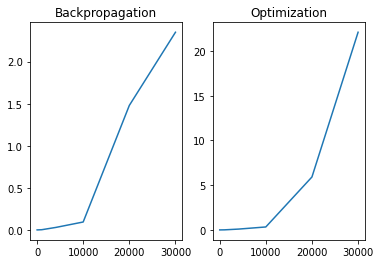

In [152]:
experiment(list_num_dim)